[ 6 -4]
[[1 1]
 [1 4]]
[[ 4.  -2.4]
 [-2.4  9. ]]
[[[-8.         -8.        ]
  [-7.83838384 -8.        ]
  [-7.67676768 -8.        ]
  ...
  [ 7.67676768 -8.        ]
  [ 7.83838384 -8.        ]
  [ 8.         -8.        ]]

 [[-8.         -7.83838384]
  [-7.83838384 -7.83838384]
  [-7.67676768 -7.83838384]
  ...
  [ 7.67676768 -7.83838384]
  [ 7.83838384 -7.83838384]
  [ 8.         -7.83838384]]

 [[-8.         -7.67676768]
  [-7.83838384 -7.67676768]
  [-7.67676768 -7.67676768]
  ...
  [ 7.67676768 -7.67676768]
  [ 7.83838384 -7.67676768]
  [ 8.         -7.67676768]]

 ...

 [[-8.          7.67676768]
  [-7.83838384  7.67676768]
  [-7.67676768  7.67676768]
  ...
  [ 7.67676768  7.67676768]
  [ 7.83838384  7.67676768]
  [ 8.          7.67676768]]

 [[-8.          7.83838384]
  [-7.83838384  7.83838384]
  [-7.67676768  7.83838384]
  ...
  [ 7.67676768  7.83838384]
  [ 7.83838384  7.83838384]
  [ 8.          7.83838384]]

 [[-8.          8.        ]
  [-7.83838384  8.        ]
  [-7.67

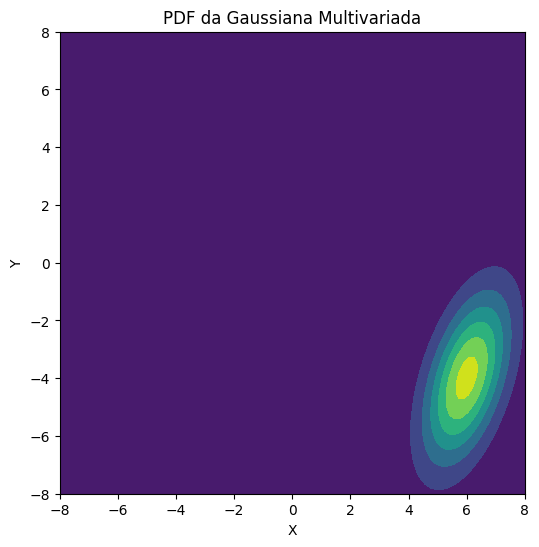

In [33]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

# p(C_{+1})
p1 = 0.7
# p(C_{-1})
p2 = 0.3

# p(x|C_{+1})
mu1 = np.array([6, -4])
print(mu1)
cov1 = np.array([[1, 1],[1, 4]])
print(cov1)
x1 = multivariate_normal(mean = mu1, cov= cov1)
# p(x|C_{-1})
mu2 = np.array([0.5, 2.5])
# print(mu2)
cov2 = np.array([[4, -2.4],[-2.4, 9]])
print(cov2)
x2 = multivariate_normal(mean = mu2, cov= cov2)

# points
x = np.linspace(-8, 8, 100)
y = np.linspace(-8, 8, 100)

# construir as coordenadas
X, Y = np.meshgrid(x, y)
coord = np.dstack((X, Y))
print(coord)

# discriminant functions
g1 = p1 * np.array(x1.pdf(coord))
g2 = p2 * np.array(x2.pdf(coord))

# Plotar a PDF
fig = plt.figure(figsize=(6, 6))
plt.contourf(X, Y, g1)
# plt.contourf(X, Y, g2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('PDF da Gaussiana Multivariada')
plt.show()


In [ ]:
boundary = 0.6787

error = 0
aux = 0
for i in range(len(x)):
    # erro 1
    if x[i] <= boundary:
        error += g1[i] # g_{+1}
        aux += 1
    # erro 2
    elif x[i] <= 2:
        error += g2[i] # g_{-1}
        aux += 1
pError = error/aux

print('Error probability = '+str(pError))

Error probability = 0.03131026032724111
